In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('Mall_Customers.csv')
x = df.iloc[:,[3,4]].values

In [11]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


<AxesSubplot:>

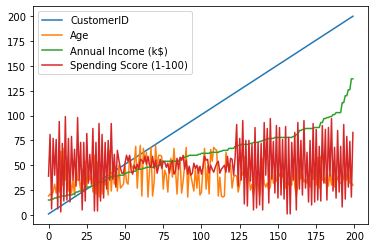

In [15]:
df.plot()

In [16]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [17]:
df['Gender'] = le.fit_transform(df['Gender'])

C:\Users\shwet\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

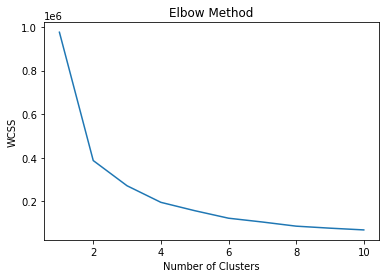

In [18]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [19]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) # we are taking 5 clusters i = 6
Kmeans_pred = kmeans.fit_predict(x)

In [20]:
Kmeans_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

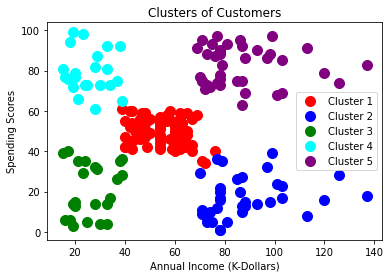

In [21]:
plt.scatter(x[Kmeans_pred == 0 ,0], x[Kmeans_pred == 0 ,1], s= 100, c = 'red', label = 'Cluster 1')    # for cluster 1 we have made y_kmeans ==0
plt.scatter(x[Kmeans_pred == 1 ,0], x[Kmeans_pred == 1 ,1], s= 100, c = 'blue', label = 'Cluster 2')    # for cluster 2 we have made y_kmeans ==0
plt.scatter(x[Kmeans_pred == 2 ,0], x[Kmeans_pred == 2 ,1], s= 100, c = 'green', label = 'Cluster 3')    # for cluster 3 we have made y_kmeans ==0
plt.scatter(x[Kmeans_pred == 3 ,0], x[Kmeans_pred == 3 ,1], s= 100, c = 'cyan', label = 'Cluster 4')    # for cluster 4 we have made y_kmeans ==0
plt.scatter(x[Kmeans_pred == 4 ,0], x[Kmeans_pred == 4 ,1], s= 100, c = 'purple', label = 'Cluster 5')    # for cluster 5 we have made y_kmeans ==0
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (K-Dollars)')
plt.ylabel('Spending Scores')
plt.legend()
plt.show()

In [22]:
df['cluster'] = pd.DataFrame(Kmeans_pred)
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,3
2,3,0,20,16,6,2
3,4,0,23,16,77,3
4,5,0,31,17,40,2


In [23]:
df.to_csv("customers_segments.csv", index = False)